# <b>Assignment : DT</b>

<font color='red'><b> TF-IDFW2V</b></font>

<b>Tfidf w2v (w1,w2..) = (tfidf(w1) * w2v(w1) + tfidf(w2) * w2v(w2) + …)  /    (tfidf(w1) + tfidf(w2) + …)</b>

<b>(Optional) Please check course video on [AVgw2V and TF-IDFW2V ](https://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/2916/avg-word2vec-tf-idf-weighted-word2vec/3/module-3-foundations-of-natural-language-processing-and-machine-learning)for more details.

<font color='blue'><b>Glove vectors </b></font>

<b>In this assignment you will be working with glove vectors , please check  [this](https://en.wikipedia.org/wiki/GloVe_(machine_learning)) and [this](https://en.wikipedia.org/wiki/GloVe_(machine_learning)) for more details.</b><br>

Download glove vectors from this [link ](https://drive.google.com/file/d/1lDca_ge-GYO0iQ6_XDLWePQFMdAA2b8f/view?usp=sharing)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import pickle

In [ ]:
#please use below code to load glove vectors
with open('/content/drive/MyDrive/Donars_choose_DT/glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

or else , you can use below code

In [ ]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:

Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

# <font color='red'> <b>Task - 1</b></font>

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features +  preprocessed_essay (TFIDF) + Sentiment scores(preprocessed_essay)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features +  preprocessed_essay (TFIDF W2V) + Sentiment scores(preprocessed_essay)</li>        </ul>
    </li>
    <li><strong>The hyper paramter tuning (best `depth` in range [1, 5, 10, 50], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation(use gridsearch cv or randomsearch cv)/simple cross validation data(you can write your own for loops refer sample solution)</li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>min_sample_split</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>min_sample_split</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud(https://www.geeksforgeeks.org/generating-word-cloud-python/) with the words of essay text of these `false positive data points`</li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
   

In [ ]:
!pip install chart_studio

     |████████████████████████████████| 64 kB 2.0 MB/s 


# Necessary Libraries

In [ ]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/

import pickle
from tqdm import tqdm
import os

from scipy.sparse import hstack
from scipy.sparse import coo_matrix
from scipy.sparse import hstack
from scipy.sparse import coo_matrix

import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

from sklearn.tree import DecisionTreeClassifier

This cell output is too large and can only be displayed while logged in.


# Loading data

In [ ]:
data  = pd.read_csv('/content/drive/MyDrive/Donars_choose_DT/preprocessed_data.csv')
# data  = pd.read_csv('preprocessed_data.csv', nrows=50000) # you can take less number of rows like this
data.head(5)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00
3,ga,mrs,grades_prek_2,2,1,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04
4,wa,mrs,grades_3_5,2,1,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74


##**Sentiment Analysis**

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
data_sentiment = pd.DataFrame(columns= ['compound', 'neg', 'neu', 'pos'])
for es in tqdm(data['essay'].values):
  data_sentiment = data_sentiment.append(sid.polarity_scores(es), ignore_index=True)
print(data_sentiment.shape)
data_sentiment.head()

100%|██████████| 109248/109248 [09:58<00:00, 182.65it/s]

(109248, 4)


,compound,neg,neu,pos
0,0.9867,0.013,0.783,0.205
1,0.9897,0.072,0.680,0.248
2,0.9860,0.017,0.721,0.262
3,0.9524,0.030,0.783,0.187
4,0.9873,0.029,0.683,0.288


In [ ]:
data_sentiment.to_csv('/content/drive/MyDrive/Donars_choose_DT/sentiment_analysis.csv')

In [ ]:
data_sentiment = pd.read_csv('/content/drive/MyDrive/Donars_choose_DT/sentiment_analysis.csv')
data_sentiment = data_sentiment.drop('Unnamed: 0', 1)
print(data_sentiment.shape)
data_sentiment.head()

(109248, 4)


,compound,neg,neu,pos
0,0.9867,0.013,0.783,0.205
1,0.9897,0.072,0.680,0.248
2,0.9860,0.017,0.721,0.262
3,0.9524,0.030,0.783,0.187
4,0.9873,0.029,0.683,0.288


In [ ]:
data = data.join(data_sentiment)
print(data.shape)
data.head()

(109248, 13)


,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price,compound,neg,neu,pos
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05,0.9867,0.013,0.783,0.205
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03,0.9897,0.072,0.680,0.248
2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00,0.9860,0.017,0.721,0.262
3,ga,mrs,grades_prek_2,2,1,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04,0.9524,0.030,0.783,0.187
4,wa,mrs,grades_3_5,2,1,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74,0.9873,0.029,0.683,0.288


##Train, CV, Test split

In [ ]:
X = data.copy()
y = data['project_is_approved'].values
print(X.shape)
print(y.shape)

(109248, 13)
(109248,)


In [ ]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state = 0)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.10, random_state = 0)
print(X_train.shape)
print(X_cv.shape)
print(X_test.shape)

(88490, 13)
(9833, 13)
(10925, 13)


# Vectorizing text data

## TFIDF Vectorizer

In [ ]:
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print('='*100)

tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['essay'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_tfidf = tfidf_model.transform(X_train['essay'].values)
X_cv_essay_tfidf = tfidf_model.transform(X_cv['essay'].values)
X_test_essay_tfidf = tfidf_model.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_cv_essay_tfidf.shape, y_cv.shape)
print(X_test_essay_tfidf.shape, y_test.shape)
print("="*100)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

(88490, 13) (88490,)
(9833, 13) (9833,)
(10925, 13) (10925,)
After vectorizations
(88490, 51948) (88490,)
(9833, 51948) (9833,)
(10925, 51948) (10925,)


## TFIDF weighted Word2Vec

### X_train

In [ ]:
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))
tfidf_w2v_train = coo_matrix(np.array(tfidf_w2v_vectors))
tfidf_w2v_train.shape

100%|██████████| 88490/88490 [03:13<00:00, 456.76it/s]


88490
300


(88490, 300)

In [ ]:
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))
tfidf_w2v_cv = coo_matrix(np.array(tfidf_w2v_vectors))
tfidf_w2v_cv.shape

100%|██████████| 9833/9833 [00:21<00:00, 460.56it/s]


9833
300


(9833, 300)

### X_test

In [ ]:
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))
tfidf_w2v_test = coo_matrix(np.array(tfidf_w2v_vectors))
tfidf_w2v_test.shape

100%|██████████| 10925/10925 [00:23<00:00, 463.10it/s]


10925
300


(10925, 300)

# Encoding of cotegorical features

##Feature: school_state, teacher_prefix, projet_grade_category, clean_categories, clean_subcategories

In [ ]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values)
train_school_state_ohe = vectorizer.transform(X_train['school_state'].values)
cv_school_state_ohe = vectorizer.transform(X_cv['school_state'].values)
test_school_state_ohe = vectorizer.transform(X_test['school_state'].values)
print(vectorizer.get_feature_names())
print(train_school_state_ohe.shape)
print(cv_school_state_ohe.shape)
print(test_school_state_ohe.shape)

['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']
(88490, 51)
(9833, 51)
(10925, 51)


In [ ]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values)
train_teacher_prefix_ohe = vectorizer.transform(X_train['teacher_prefix'].values)
cv_teacher_prefix_ohe = vectorizer.transform(X_cv['teacher_prefix'].values)
test_teacher_prefix_ohe = vectorizer.transform(X_test['teacher_prefix'].values)
print(vectorizer.get_feature_names())
print(train_teacher_prefix_ohe.shape)
print(cv_teacher_prefix_ohe.shape)
print(test_teacher_prefix_ohe.shape)

['dr', 'mr', 'mrs', 'ms', 'teacher']
(88490, 5)
(9833, 5)
(10925, 5)


In [ ]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_grade_category'].values)
train_project_grade_ohe = vectorizer.transform(X_train['project_grade_category'].values)
cv_project_grade_ohe = vectorizer.transform(X_cv['project_grade_category'].values)
test_project_grade_ohe = vectorizer.transform(X_test['project_grade_category'].values)
print(vectorizer.get_feature_names())
print(train_project_grade_ohe.shape)
print(cv_project_grade_ohe.shape)
print(test_project_grade_ohe.shape)

['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']
(88490, 4)
(9833, 4)
(10925, 4)


In [ ]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_categories'].values)
train_category_ohe = vectorizer.transform(X_train['clean_categories'].values)
cv_category_ohe = vectorizer.transform(X_cv['clean_categories'].values)
test_category_ohe = vectorizer.transform(X_test['clean_categories'].values)
print(vectorizer.get_feature_names())
print(train_category_ohe.shape)
print(cv_category_ohe.shape)
print(test_category_ohe.shape)

['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']
(88490, 9)
(9833, 9)
(10925, 9)


In [ ]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_subcategories'].values)
train_subcategory_ohe = vectorizer.transform(X_train['clean_subcategories'].values)
cv_subcategory_ohe = vectorizer.transform(X_cv['clean_subcategories'].values)
test_subcategory_ohe = vectorizer.transform(X_test['clean_subcategories'].values)
print(vectorizer.get_feature_names())
print(train_subcategory_ohe.shape)
print(cv_subcategory_ohe.shape)
print(test_subcategory_ohe.shape)

['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']
(88490, 30)
(9833, 30)
(10925, 30)


#Set 1

In [ ]:
X_tr_1 = hstack([X_train_essay_tfidf, train_school_state_ohe, train_teacher_prefix_ohe, train_project_grade_ohe, train_category_ohe, train_subcategory_ohe, X_train[['teacher_number_of_previously_posted_projects','price','compound','neg','neu','pos']].values]).tocsr()
X_cr_1 = hstack([X_cv_essay_tfidf, cv_school_state_ohe, cv_teacher_prefix_ohe, cv_project_grade_ohe, cv_category_ohe, cv_subcategory_ohe, X_cv[['teacher_number_of_previously_posted_projects','price','compound','neg','neu','pos']].values]).tocsr()
X_te_1 = hstack([X_test_essay_tfidf, test_school_state_ohe, test_teacher_prefix_ohe, test_project_grade_ohe, test_category_ohe, test_subcategory_ohe, X_test[['teacher_number_of_previously_posted_projects','price','compound','neg','neu','pos']].values]).tocsr()
print(X_tr_1.shape)
print(X_cr_1.shape)
print(X_te_1.shape)


(88490, 52053)
(9833, 52053)
(10925, 52053)


#Set 2

In [ ]:
X_tr_2 = hstack([tfidf_w2v_train, train_school_state_ohe, train_teacher_prefix_ohe, train_project_grade_ohe, train_category_ohe, train_subcategory_ohe, X_train[['teacher_number_of_previously_posted_projects','price','compound','neg','neu','pos']].values]).tocsr()
X_cr_2 = hstack([tfidf_w2v_cv, cv_school_state_ohe, cv_teacher_prefix_ohe, cv_project_grade_ohe, cv_category_ohe, cv_subcategory_ohe, X_cv[['teacher_number_of_previously_posted_projects','price','compound','neg','neu','pos']].values]).tocsr()
X_te_2 = hstack([tfidf_w2v_test, test_school_state_ohe, test_teacher_prefix_ohe, test_project_grade_ohe, test_category_ohe, test_subcategory_ohe, X_test[['teacher_number_of_previously_posted_projects','price','compound','neg','neu','pos']].values]).tocsr()
print(X_tr_2.shape)
print(X_cr_2.shape)
print(X_te_2.shape)

(88490, 405)
(9833, 405)
(10925, 405)


#1. Decision Tree on data **Set - 1**

##Hyper parameter tuning

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
depth = [1, 5, 10, 50]
min_samples_split = [5, 10, 100, 500]
train_auc = []
cv_auc = []
for i in tqdm(depth):
  train_depth_auc = []
  cv_depth_auc = []
  for j in min_samples_split:
    clf = DecisionTreeClassifier(max_depth = i, min_samples_split= j)
    clf.fit(X_tr_1, y_train)
    y_cv_pred = clf.predict_proba(X_cr_1)[:,1]
    y_train_pred = clf.predict_proba(X_tr_1)[:,1]
    train_depth_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_depth_auc.append(roc_auc_score(y_cv, y_cv_pred))

  train_auc.append(train_depth_auc)
  cv_auc.append(cv_depth_auc)

100%|██████████| 4/4 [13:18<00:00, 199.56s/it]


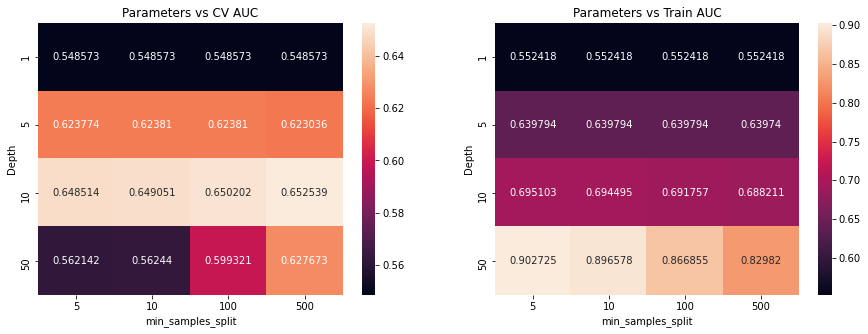

In [ ]:
#heatmap of cv_auc
import seaborn as sns
plt.figure(figsize = (15,5))
plt.subplot(121)
sns.heatmap(np.array(cv_auc),annot= True,fmt = 'g', xticklabels= min_samples_split, yticklabels= depth)
plt.title('Parameters vs CV AUC')
plt.xlabel('min_samples_split')
plt.ylabel('Depth')
plt.subplot(122)
sns.heatmap(np.array(train_auc),annot= True,fmt = 'g', xticklabels= min_samples_split, yticklabels= depth)
plt.title('Parameters vs Train AUC')
plt.xlabel('min_samples_split')
plt.ylabel('Depth')
plt.show()

## Best Decision Tree model

In [ ]:
# Seing the heatmap of AUC score of CV and Train, we can conclued that best depth = 10 and min samples split = 500
best_depth = 10
best_min_samples_split = 500
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth= best_depth, min_samples_split= best_min_samples_split)
clf.fit(X_tr_1, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## ROC Curve

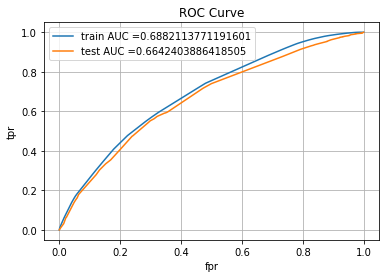

In [ ]:
y_train_pred = clf.predict_proba(X_tr_1)[:,1]
y_test_pred = clf.predict_proba(X_te_1)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC Curve")
plt.grid()
plt.show()

## Confusion matrix for Test and train

In [ ]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [ ]:
import seaborn as sns
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
cm_train = confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))
cm_test = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))

the maximum value of tpr*(1-fpr) 0.4012390740713385 for threshold 0.845


Train confusion matrix


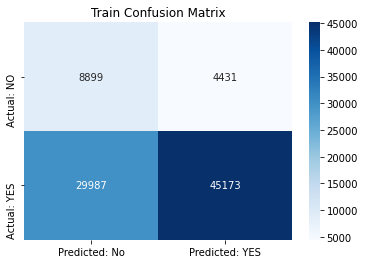

In [ ]:
print("Train confusion matrix")
ax= plt.subplot();
sns.heatmap(cm_train, annot=True,fmt="d",cmap='Blues');
# labels, title and ticks
ax.set_ylim(2.0, 0)
ax.set_title('Train Confusion Matrix');
ax.xaxis.set_ticklabels(['Predicted: No','Predicted: YES']);
ax.yaxis.set_ticklabels(['Actual: NO','Actual: YES']);

Test confusion matrix


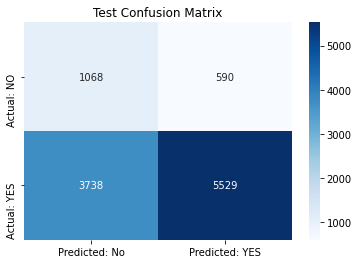

In [ ]:
print("Test confusion matrix")
ax= plt.subplot();
sns.heatmap(cm_test, annot=True,fmt="d",cmap='Blues');
# labels, title and ticks
ax.set_ylim(2.0, 0)
ax.set_title('Test Confusion Matrix');
ax.xaxis.set_ticklabels(['Predicted: No','Predicted: YES']);
ax.yaxis.set_ticklabels(['Actual: NO','Actual: YES']);

### False Positive Data Points

In [ ]:
X_test['y_pred'] = predict_with_best_t(y_test_pred, best_t)
X_test.head()

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price,compound,neg,neu,pos,y_pred
75155,sc,ms,grades_6_8,4,1,music_arts,performingarts,it truly amazing arts integration school curri...,454.56,0.9938,0.018,0.680,0.302,0
77488,pa,ms,grades_3_5,1,1,math_science specialneeds,mathematics specialneeds,my students need chromebooks headphones utiliz...,67.27,0.9490,0.060,0.770,0.170,1
7803,ut,mrs,grades_3_5,3,1,music_arts,music performingarts,we 80 students every year third grade we schoo...,188.99,0.9914,0.000,0.687,0.313,0
56268,nc,mrs,grades_3_5,1,1,health_sports,gym_fitness health_wellness,i 20 amazing third graders eager learn our sch...,549.81,0.9960,0.015,0.691,0.294,1
46902,la,mrs,grades_prek_2,2,0,literacy_language,literacy,i teach 20 kindergarten children including esl...,1267.83,0.9862,0.036,0.697,0.267,1


In [ ]:
false_positive = X_test[(X_test['project_is_approved'] == 0) & (X_test['y_pred'] == 1)]
print(false_positive.shape)

(590, 14)


### Word Cloud

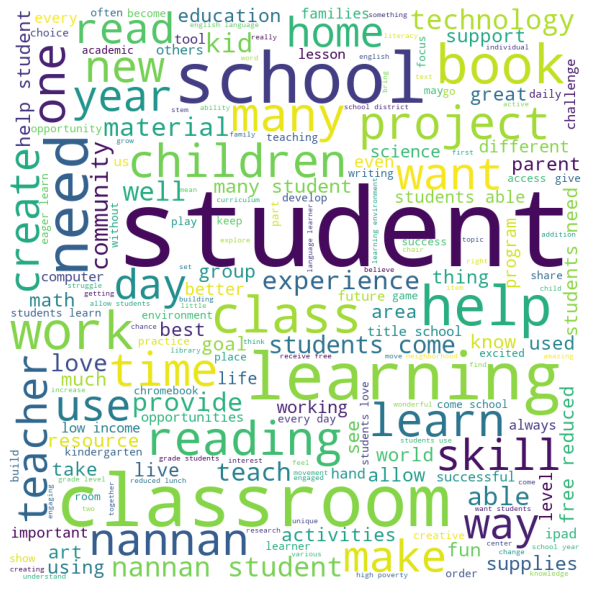

In [ ]:
#https://www.geeksforgeeks.org/generating-word-cloud-python/

# Python program to generate WordCloud

# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in false_positive['essay'].values:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

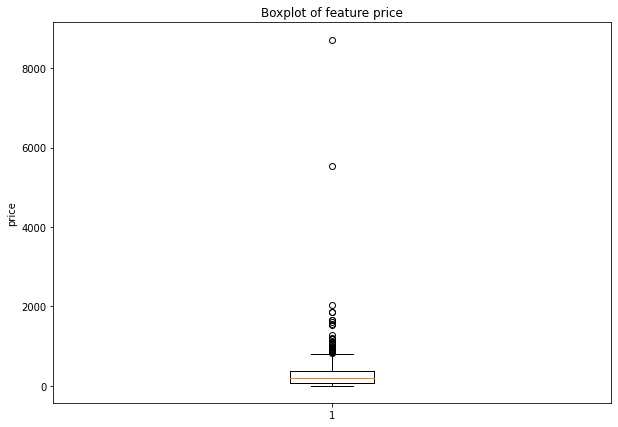

In [ ]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(false_positive['price'].values)
plt.title('Boxplot of feature price')
plt.ylabel('price')
plt.show()

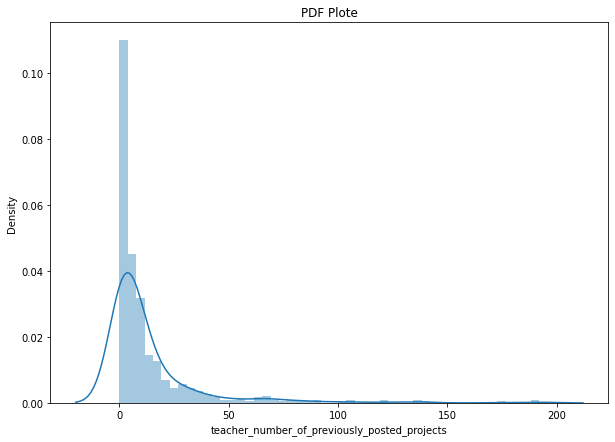

In [ ]:
# PDF Plot of teacher_number_of_previously_posted_projects
import seaborn as sns
fig = plt.figure(figsize =(10, 7))
sns.distplot(false_positive['teacher_number_of_previously_posted_projects'].values)
plt.xlabel('teacher_number_of_previously_posted_projects')
plt.title('PDF Plote')
plt.show()

#2. Decision Tree on data **Set - 2**

##Hyper parameter tuning

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
depth = [1, 5, 10, 50]
min_samples_split = [5, 10, 100, 500]
train_auc = []
cv_auc = []
for i in tqdm(depth):
  train_depth_auc = []
  cv_depth_auc = []
  for j in min_samples_split:
    clf = DecisionTreeClassifier(max_depth = i, min_samples_split= j)
    clf.fit(X_tr_2, y_train)
    y_cv_pred = clf.predict_proba(X_cr_2)[:,1]
    y_train_pred = clf.predict_proba(X_tr_2)[:,1]
    train_depth_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_depth_auc.append(roc_auc_score(y_cv, y_cv_pred))

  train_auc.append(train_depth_auc)
  cv_auc.append(cv_depth_auc)

100%|██████████| 4/4 [25:23<00:00, 380.87s/it]


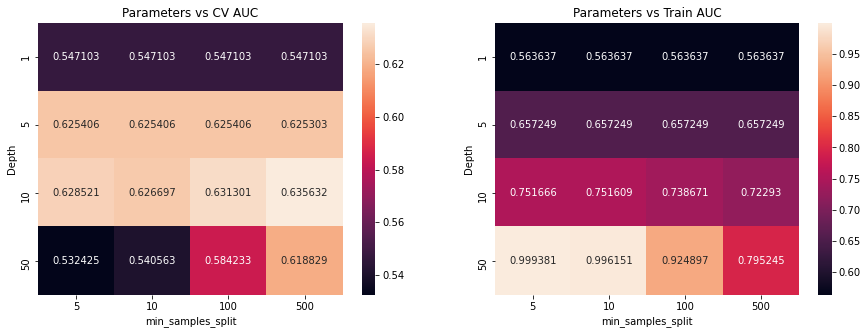

In [ ]:
#heatmap of cv_auc
import seaborn as sns
plt.figure(figsize = (15,5))
plt.subplot(121)
sns.heatmap(np.array(cv_auc),annot= True,fmt = 'g', xticklabels= min_samples_split, yticklabels= depth)
plt.title('Parameters vs CV AUC')
plt.xlabel('min_samples_split')
plt.ylabel('Depth')
plt.subplot(122)
sns.heatmap(np.array(train_auc),annot= True,fmt = 'g', xticklabels= min_samples_split, yticklabels= depth)
plt.title('Parameters vs Train AUC')
plt.xlabel('min_samples_split')
plt.ylabel('Depth')
plt.show()

## Best Decision Tree model

In [ ]:
# Seing the heatmap of AUC score of CV and Train, we can conclued that best depth = 10 and min samples split = 500
best_depth = 10
best_min_samples_split = 500
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth= best_depth, min_samples_split= best_min_samples_split)
clf.fit(X_tr_2, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## ROC Curve

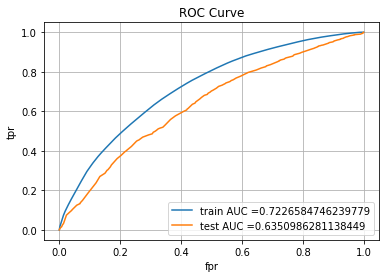

In [ ]:
y_train_pred = clf.predict_proba(X_tr_2)[:,1]
y_test_pred = clf.predict_proba(X_te_2)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC Curve")
plt.grid()
plt.show()

## Confusion matrix for Test and train

In [ ]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [ ]:
import seaborn as sns
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
cm_train = confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))
cm_test = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))

the maximum value of tpr*(1-fpr) 0.438777932907921 for threshold 0.854


Train confusion matrix


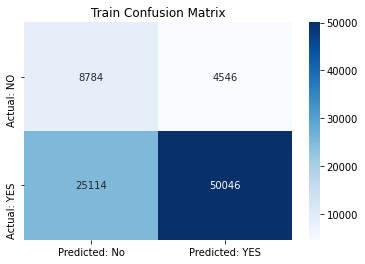

In [ ]:
print("Train confusion matrix")
ax= plt.subplot();
sns.heatmap(cm_train, annot=True,fmt="d",cmap='Blues');
# labels, title and ticks
ax.set_ylim(2.0, 0)
ax.set_title('Train Confusion Matrix');
ax.xaxis.set_ticklabels(['Predicted: No','Predicted: YES']);
ax.yaxis.set_ticklabels(['Actual: NO','Actual: YES']);

Test confusion matrix


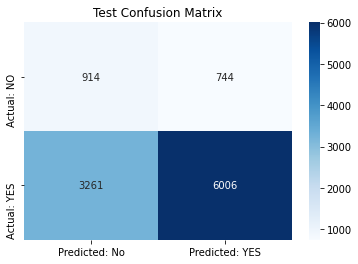

In [ ]:
print("Test confusion matrix")
ax= plt.subplot();
sns.heatmap(cm_test, annot=True,fmt="d",cmap='Blues');
# labels, title and ticks
ax.set_ylim(2.0, 0)
ax.set_title('Test Confusion Matrix');
ax.xaxis.set_ticklabels(['Predicted: No','Predicted: YES']);
ax.yaxis.set_ticklabels(['Actual: NO','Actual: YES']);

### False Positive Data Points

In [ ]:
X_test['y_pred'] = predict_with_best_t(y_test_pred, best_t)
X_test.head()

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price,compound,neg,neu,pos,y_pred
75155,sc,ms,grades_6_8,4,1,music_arts,performingarts,it truly amazing arts integration school curri...,454.56,0.9938,0.018,0.680,0.302,1
77488,pa,ms,grades_3_5,1,1,math_science specialneeds,mathematics specialneeds,my students need chromebooks headphones utiliz...,67.27,0.9490,0.060,0.770,0.170,1
7803,ut,mrs,grades_3_5,3,1,music_arts,music performingarts,we 80 students every year third grade we schoo...,188.99,0.9914,0.000,0.687,0.313,0
56268,nc,mrs,grades_3_5,1,1,health_sports,gym_fitness health_wellness,i 20 amazing third graders eager learn our sch...,549.81,0.9960,0.015,0.691,0.294,0
46902,la,mrs,grades_prek_2,2,0,literacy_language,literacy,i teach 20 kindergarten children including esl...,1267.83,0.9862,0.036,0.697,0.267,0


In [ ]:
false_positive = X_test[(X_test['project_is_approved'] == 0) & (X_test['y_pred'] == 1)]
print(false_positive.shape)

(744, 14)


### Word Cloud

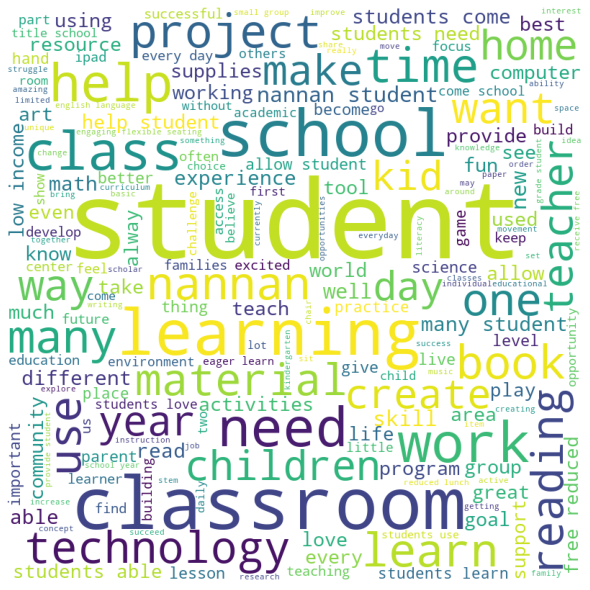

In [ ]:
#https://www.geeksforgeeks.org/generating-word-cloud-python/

# Python program to generate WordCloud

# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in false_positive['essay'].values:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

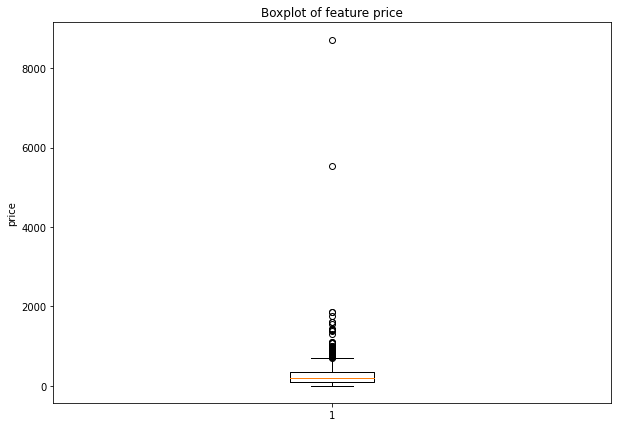

In [ ]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(false_positive['price'].values)
plt.title('Boxplot of feature price')
plt.ylabel('price')
plt.show()

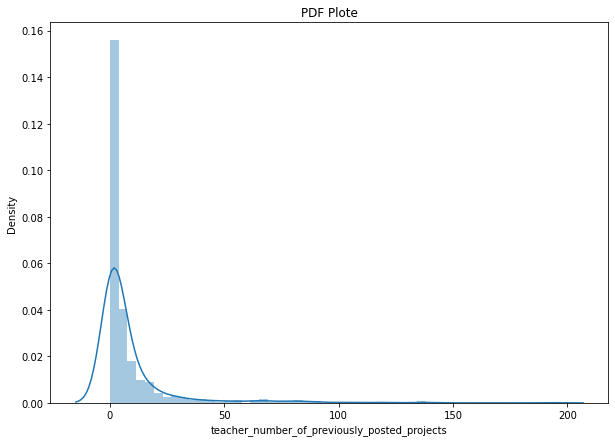

In [ ]:
# PDF Plot of teacher_number_of_previously_posted_projects
import seaborn as sns
fig = plt.figure(figsize =(10, 7))
sns.distplot(false_positive['teacher_number_of_previously_posted_projects'].values)
plt.xlabel('teacher_number_of_previously_posted_projects')
plt.title('PDF Plote')
plt.show()

# <font color='red'><b> Task - 2 </b></font>

For this task consider **set-1** features.

*  Select all the features which are having non-zero feature importance.You can get the feature importance using  'feature_importances_`
   (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), discard the all other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM).
*  You need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3<br>
  **Note**: when you want to find the feature importance make sure you don't use max_depth parameter keep it None.
  </li>
    <br>
You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_tr_1, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
feature_importance = clf.feature_importances_
feature_importance.shape

(52053,)

#Keeping the feature which have non zero importance

In [ ]:
#removing the feature which 0 importance
#https://stackoverflow.com/questions/23966923/delete-columns-of-matrix-of-csr-format-in-python?lq=1

cols_to_delete = np.where(feature_importance == 0)[0] # indeces of feature which have zero importance
all_cols = np.arange(X_tr_1.shape[1])
cols_to_keep = np.where(np.logical_not(np.in1d(all_cols, cols_to_delete)))[0]
X_tr = X_tr_1[:, cols_to_keep]
X_cr = X_cr_1[:, cols_to_keep]
X_te = X_te_1[:, cols_to_keep]
print(X_tr.shape)
print(X_cr.shape)
print(X_te.shape)

(88490, 4112)
(9833, 4112)
(10925, 4112)


#3. Logistic Regression after keeping feature which have non-zero importance

## Hyper parameter tuning

100%|██████████| 9/9 [00:39<00:00,  4.42s/it]


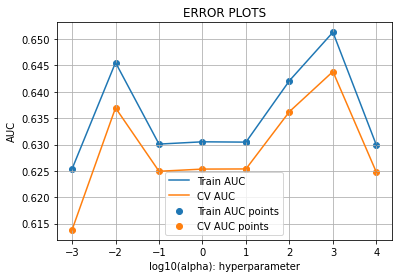

In [ ]:
from sklearn.linear_model import LogisticRegression
train_auc = []
cv_auc = []
alpha = [0.001, 0.01, 0.1, 1, 10, 10, 100, 1000,10000]
for i in tqdm(alpha):
    clf = LogisticRegression(C = i)
    clf.fit(X_tr, y_train)

    y_train_pred = clf.predict_proba(X_tr)[:,1]
    y_cv_pred = clf.predict_proba(X_cr)[:,1]

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

from math import log
K = [log(y,10) for y in alpha]

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("log10(alpha): hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

## Best Logistic Regression model

In [ ]:
best_prem = 1000
clf = LogisticRegression( C = 1000 )
clf.fit(X_tr,y_train)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## ROC Curve

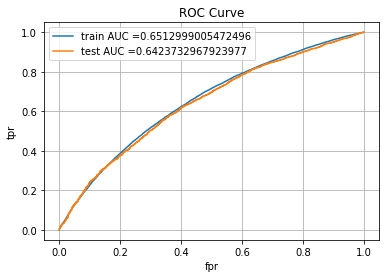

In [ ]:
y_train_pred = clf.predict_proba(X_tr)[:,1]
y_test_pred = clf.predict_proba(X_te)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC Curve")
plt.grid()
plt.show()

## Confusion matrix for Test and train

In [ ]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [ ]:
import seaborn as sns
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
cm_train = confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))
cm_test = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))

the maximum value of tpr*(1-fpr) 0.3742776859728503 for threshold 0.848


Train confusion matrix


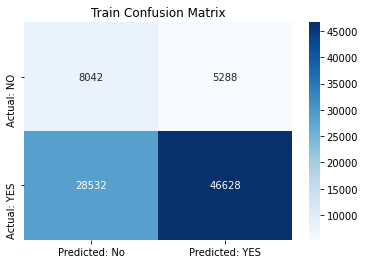

In [ ]:
print("Train confusion matrix")
ax= plt.subplot();
sns.heatmap(cm_train, annot=True,fmt="d",cmap='Blues');
# labels, title and ticks
ax.set_ylim(2.0, 0)
ax.set_title('Train Confusion Matrix');
ax.xaxis.set_ticklabels(['Predicted: No','Predicted: YES']);
ax.yaxis.set_ticklabels(['Actual: NO','Actual: YES']);

Test confusion matrix


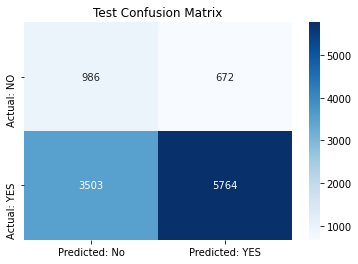

In [ ]:
print("Test confusion matrix")
ax= plt.subplot();
sns.heatmap(cm_test, annot=True,fmt="d",cmap='Blues');
# labels, title and ticks
ax.set_ylim(2.0, 0)
ax.set_title('Test Confusion Matrix');
ax.xaxis.set_ticklabels(['Predicted: No','Predicted: YES']);
ax.yaxis.set_ticklabels(['Actual: NO','Actual: YES']);

### False Positive Data Points

In [ ]:
X_test['y_pred'] = predict_with_best_t(y_test_pred, best_t)
X_test.head()

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price,compound,neg,neu,pos,y_pred
75155,sc,ms,grades_6_8,4,1,music_arts,performingarts,it truly amazing arts integration school curri...,454.56,0.9938,0.018,0.680,0.302,1
77488,pa,ms,grades_3_5,1,1,math_science specialneeds,mathematics specialneeds,my students need chromebooks headphones utiliz...,67.27,0.9490,0.060,0.770,0.170,1
7803,ut,mrs,grades_3_5,3,1,music_arts,music performingarts,we 80 students every year third grade we schoo...,188.99,0.9914,0.000,0.687,0.313,1
56268,nc,mrs,grades_3_5,1,1,health_sports,gym_fitness health_wellness,i 20 amazing third graders eager learn our sch...,549.81,0.9960,0.015,0.691,0.294,1
46902,la,mrs,grades_prek_2,2,0,literacy_language,literacy,i teach 20 kindergarten children including esl...,1267.83,0.9862,0.036,0.697,0.267,0


In [ ]:
false_positive = X_test[(X_test['project_is_approved'] == 0) & (X_test['y_pred'] == 1)]
print(false_positive.shape)

(672, 14)


### Word Cloud

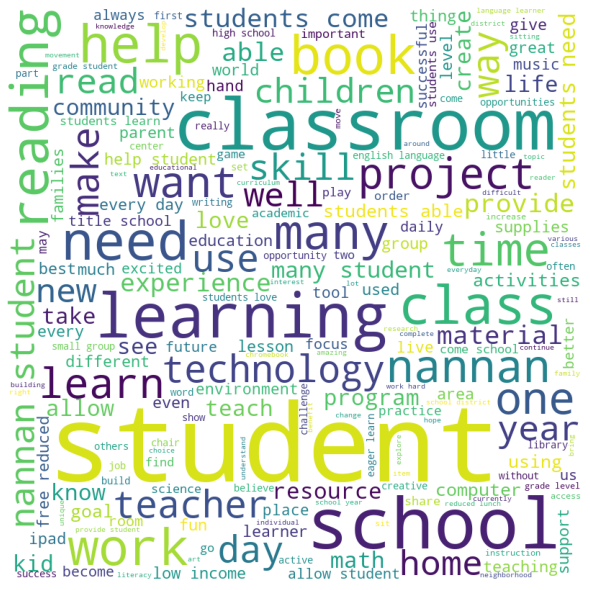

In [ ]:
#https://www.geeksforgeeks.org/generating-word-cloud-python/

# Python program to generate WordCloud

# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in false_positive['essay'].values:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

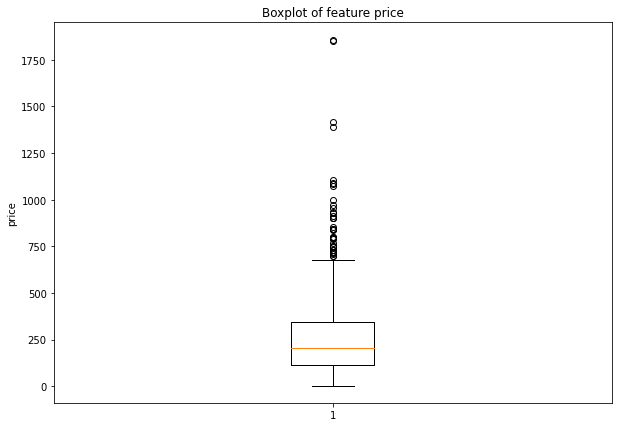

In [ ]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(false_positive['price'].values)
plt.title('Boxplot of feature price')
plt.ylabel('price')
plt.show()

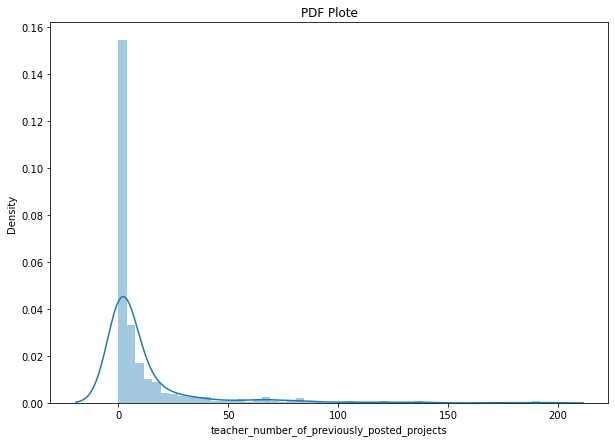

In [ ]:
# PDF Plot of teacher_number_of_previously_posted_projects
import seaborn as sns
fig = plt.figure(figsize =(10, 7))
sns.distplot(false_positive['teacher_number_of_previously_posted_projects'].values)
plt.xlabel('teacher_number_of_previously_posted_projects')
plt.title('PDF Plote')
plt.show()

<font color='blue'><b>Hint for calculating Sentiment scores</b></font>

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 